In [2198]:
# Lead Scoring Case Study

In [2199]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline


In [2200]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2201]:
# dropping the duplicates

In [2202]:
lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
           'Asymmetrique Activity Score','Asymmetrique Profile Score',
           'Tags','Lead Quality','Lead Profile'], 1, inplace = True)

In [2203]:
lead_dub = lead.copy()

# Checking for duplicates and dropping the entire duplicate row if any
lead_dub.drop_duplicates(subset=None, inplace=True)
lead_dub.shape

(9240, 30)

In [2204]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [2205]:
# we will drop the columns having more than 60% NA values.
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>60)].columns, 1)

In [2206]:
#dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [2207]:
# replace null with Mumbai in City
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [2208]:
# replace null with Mumbai in Specialization
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

In [2209]:
# replace null with Bettre career prospects in What matters most to you in choosing a course
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [2210]:
# replace null with Unemployed in What is your current occupation
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')


In [2211]:
# replace null with India in Country
lead['Country'] = lead['Country'].replace(np.nan, 'India')


In [2212]:
lead.isna().sum()/len(lead)*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [2213]:
# Rest missing values are under 1.5% so we can drop these rows.
lead.dropna(inplace = True)

In [2214]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)


In [2215]:
lead.isna().sum()/len(lead)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [2216]:
# EDA

In [2217]:
lead.Converted.value_counts()[1]/len(lead.Converted)
# almost 38% is the rate at which people are converting from leads

0.3785541106458012

In [2218]:
# univariate analysis

In [2219]:
for col in lead.columns:
    print(lead[col].describe(), '\n\n')

count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object 


count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object 


count     9074
unique       2
top         No
freq      8358
Name: Do Not Email, dtype: object 


count     9074
unique       2
top         No
freq      9072
Name: Do Not Call, dtype: object 


count    9074.000000
mean        0.378554
std         0.485053
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64 


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64 


count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.0000

In [2220]:
for col in lead.columns:
    print(lead[col].value_counts(), '\n\n')


Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 


No     8358
Yes     716
Name: Do Not Email, dtype: int64 


No     9072
Yes       2
Name: Do Not Call, dtype: int64 


0    5639
1    3435
Name: Converted, dtype: int64 


0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466


In [2221]:
# visualization

In [2222]:
# univariate analysis

In [2223]:
# categorical variables

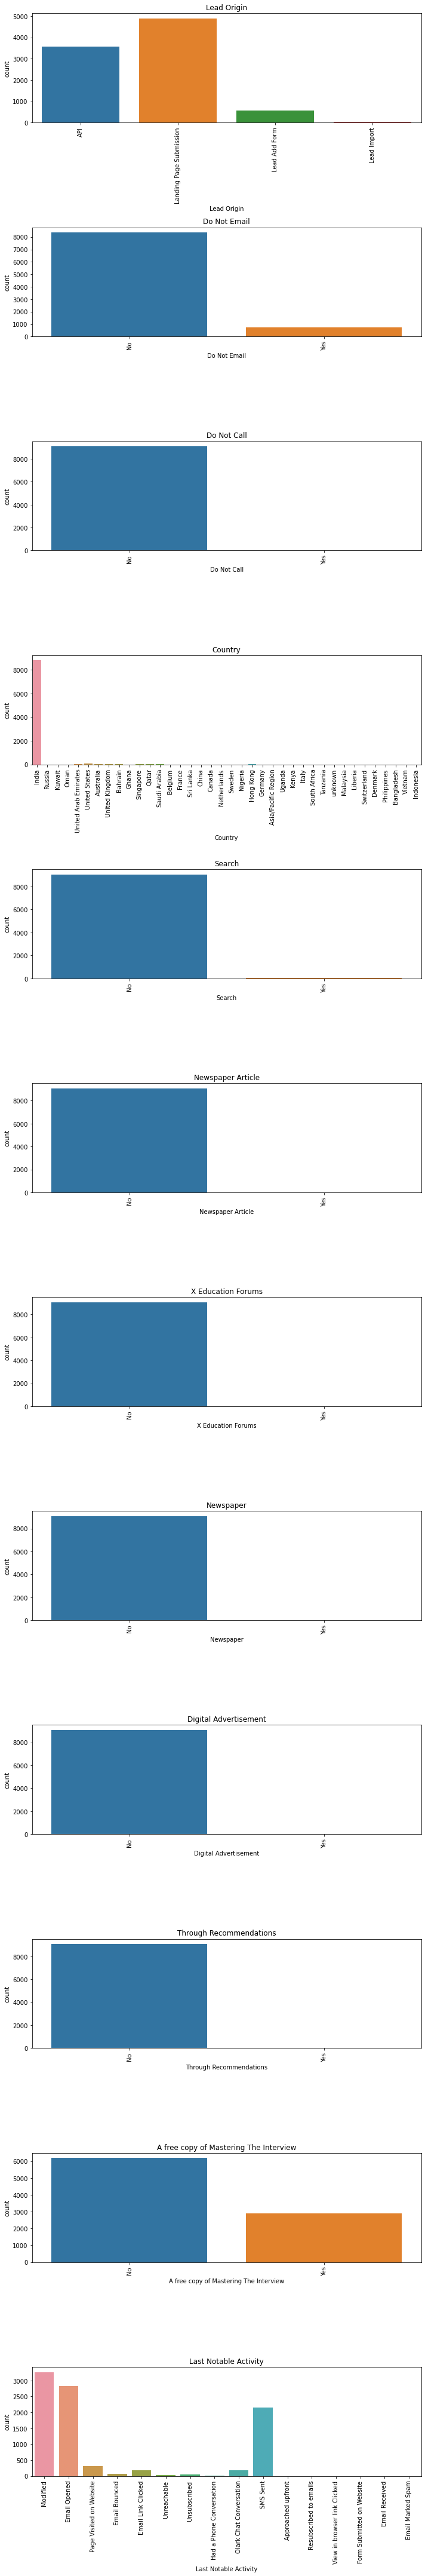

In [2244]:
# Define the categorical variables to plot
categorical_variables = ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search',
                        'Newspaper Article', 'X Education Forums', 'Newspaper',
                        'Digital Advertisement', 'Through Recommendations',
                        'A free copy of Mastering The Interview', 'Last Notable Activity']

# Create the figure and subplots
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(10, 5 * len(categorical_variables)))

# Iterate over each categorical variable and plot its countplot
for var, ax in zip(categorical_variables, axes):
    sns.countplot(x=var, data=lead, ax=ax)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [2225]:
# numerical variables

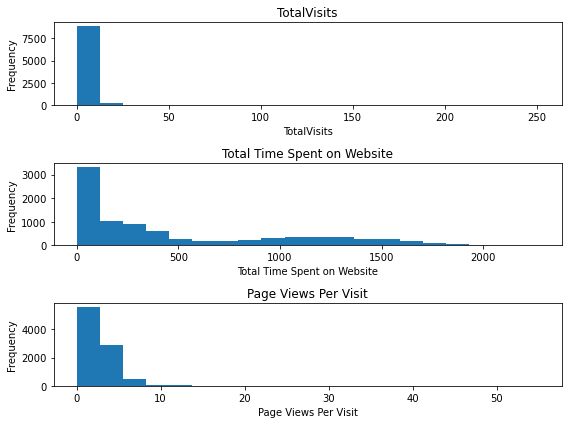

In [2242]:
import matplotlib.pyplot as plt

# Numeric variables to plot
numeric_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a figure and axis object
fig, axes = plt.subplots(nrows=len(numeric_variables), figsize=(8, 6))

# Iterate over each numeric variable and plot its histogram
for i, var in enumerate(numeric_variables):
    axes[i].hist(lead[var], bins=20)  # Adjust bins as needed
    axes[i].set_title(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()



In [2227]:
# Bivarirate analysis

In [2228]:
# Relating all the categorical variables to Converted

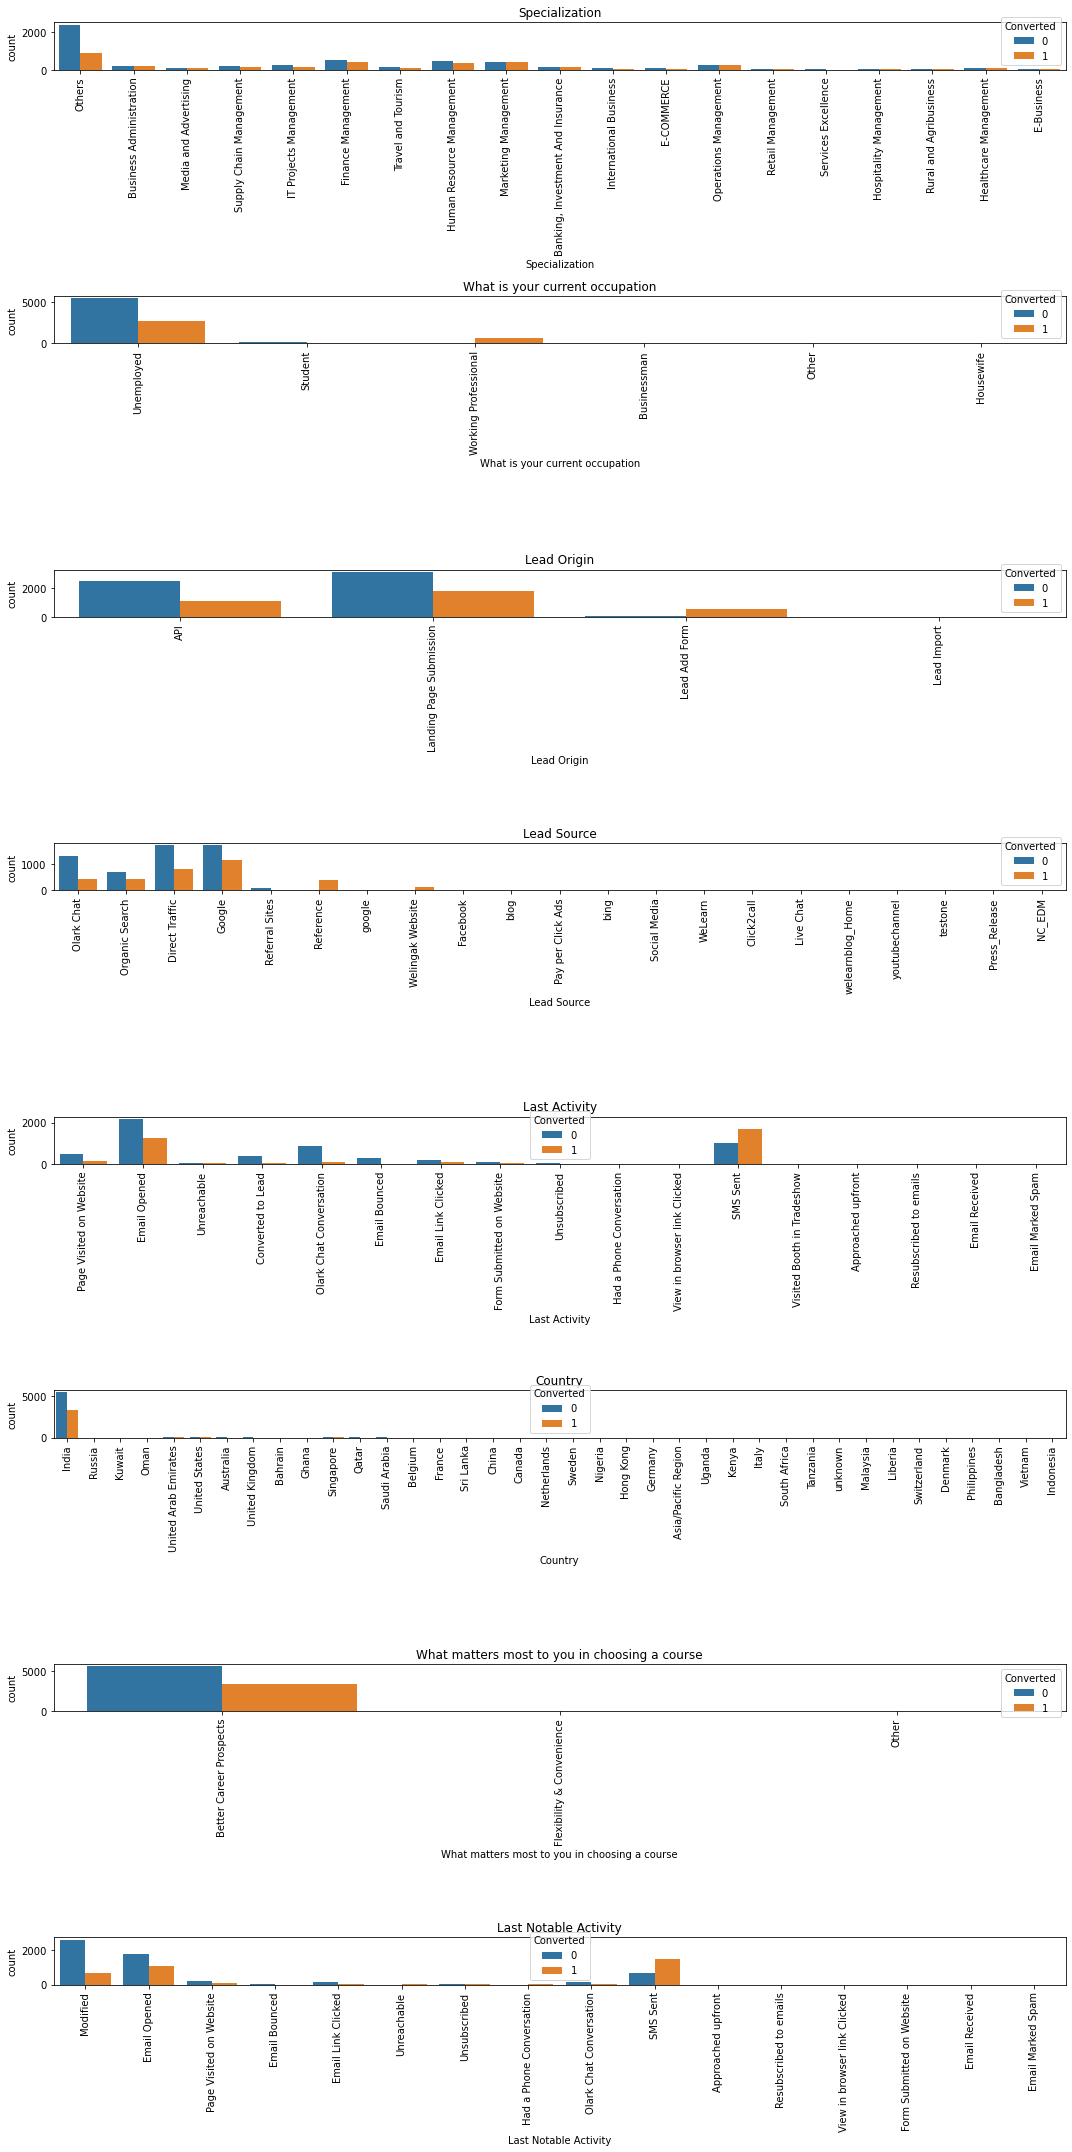

In [2240]:
data = lead[['Specialization', 'What is your current occupation','Lead Origin', 'Lead Source', 'Last Activity', 'Country',
             'What matters most to you in choosing a course', 'Last Notable Activity', 'Converted']]

# Plotting count plots for each feature
plt.figure(figsize=(15, 30))

for i, feature in enumerate(data.columns[:-1], 1):
    plt.subplot(8, 1, i)
    sns.countplot(x=feature, hue='Converted', data=data)
    plt.xticks(rotation=90)
    plt.title(feature)

plt.tight_layout()
plt.show()


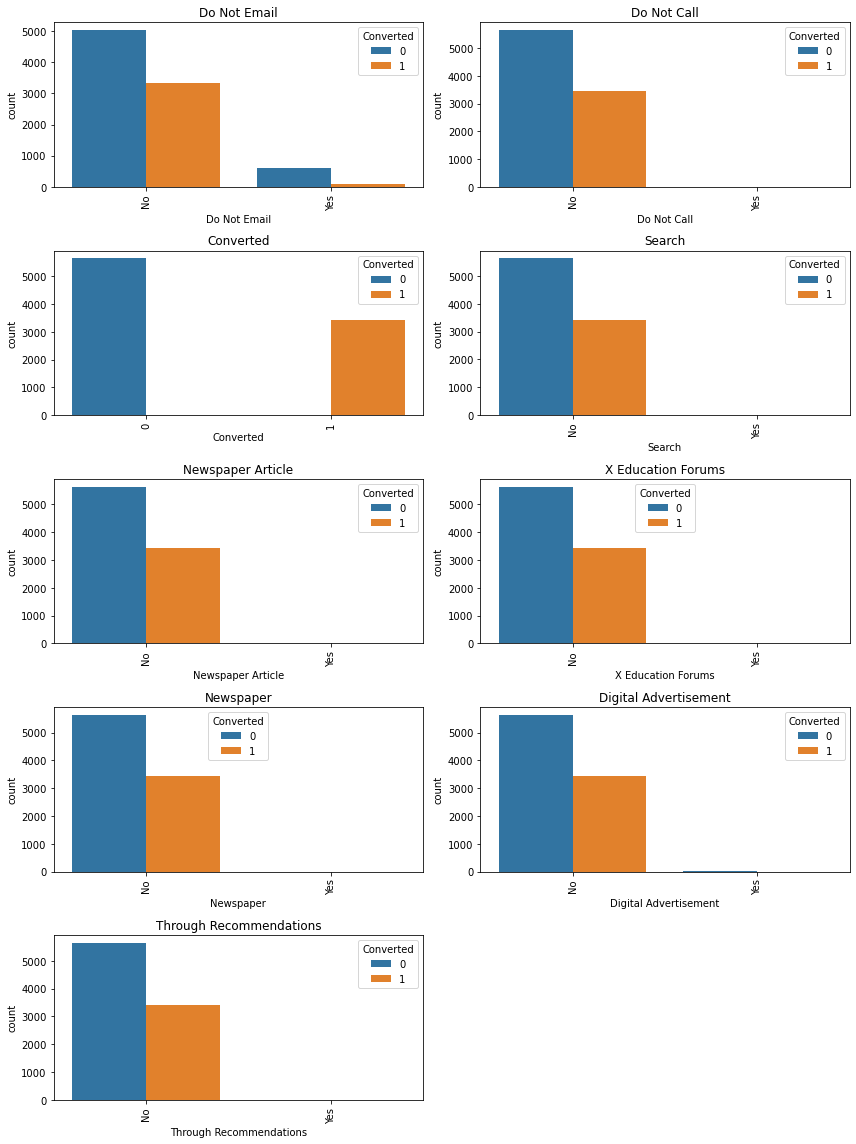

In [2232]:

# Selecting relevant columns
data = lead[['Do Not Email', 'Do Not Call', 'Converted', 'Search', 
             'Newspaper Article', 'X Education Forums', 'Newspaper', 
             'Digital Advertisement', 'Through Recommendations',
             'A free copy of Mastering The Interview']]

# Plotting count plots for each feature
plt.figure(figsize=(12, 16))

for i, feature in enumerate(data.columns[:-1], 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=feature, hue="Converted", data=data)
    plt.xticks(rotation=90)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [2018]:
# replace google with Google in Lead Source
# replace Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog',
# 'testone', 'welearnblog_Home', 'youtubechannel with Others in Lead Source
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [2019]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

# replace Other with Other_Occupation in  What is your current occupation with 
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other'], 'Other_Occupation')

# drop 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
# 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
# 'Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview','Country'

lead = lead.drop(['What matters most to you in choosing a course','Search', 'Magazine','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
                  'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview','Country'],1)

In [2020]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

In [2021]:
# Relating all the numerical variables to Converted

<Figure size 1152x288 with 0 Axes>

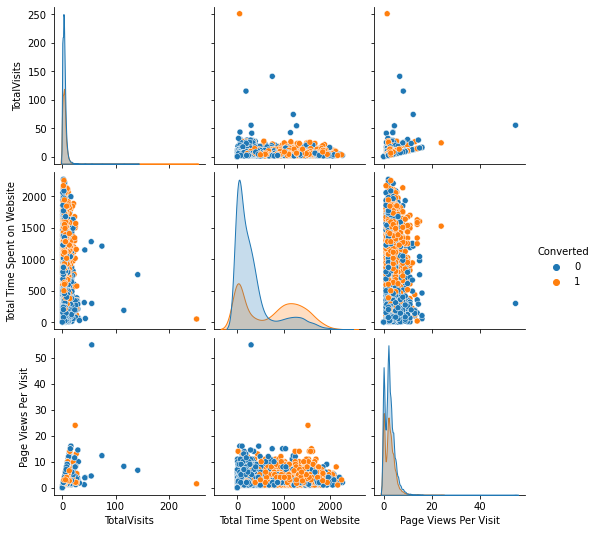

In [2022]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead,vars=lead[['TotalVisits','Total Time Spent on Website' ,'Page Views Per Visit']],hue="Converted")                                  
plt.show()

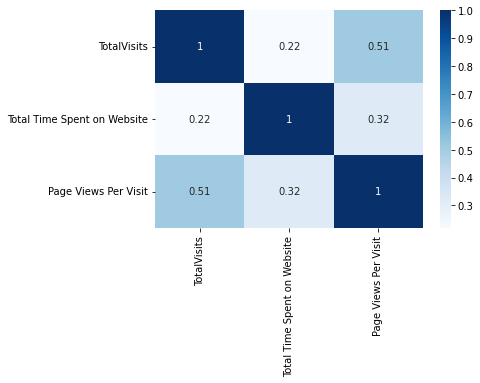

In [2023]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead[['TotalVisits','Total Time Spent on Website' ,'Page Views Per Visit']].corr(),cmap="Blues",annot=True)
plt.show()

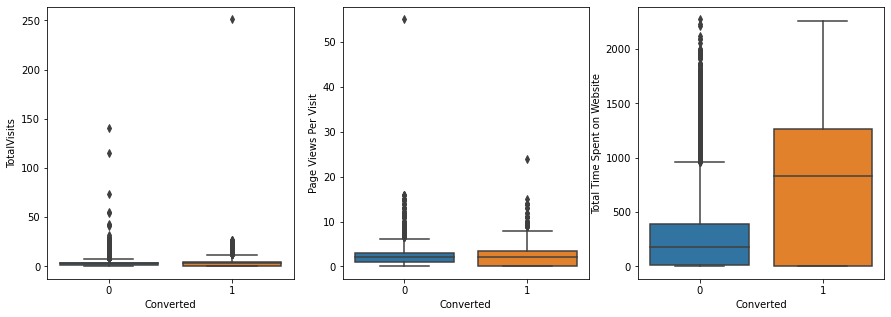

In [2024]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

In [2025]:
# Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot


In [2026]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [2027]:
# handling outliers in Page Views Per Visit and TotalVisits

# inter quartile range
int_quart_range = lead['Page Views Per Visit'].quantile([0.25, 0.75]).values[1] - lead['Page Views Per Visit'].quantile([0.25, 0.75]).values[0]
ub = 1.5*int_quart_range + lead['Page Views Per Visit'].quantile([0.25, 0.75]).values[1]
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].clip(upper=ub)


int_quart_range = lead['TotalVisits'].quantile([0.25, 0.75]).values[1] - lead['TotalVisits'].quantile([0.25, 0.75]).values[0]
ub = 1.5*int_quart_range + lead['TotalVisits'].quantile([0.25, 0.75]).values[1]
lead['TotalVisits'] = lead['TotalVisits'].clip(upper=ub)

print(lead['Page Views Per Visit'].describe(),'\n\n',
lead['TotalVisits'].describe())

count    9074.000000
mean        2.285762
std         1.834443
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max         6.500000
Name: Page Views Per Visit, dtype: float64 

 count    9074.000000
mean        3.230769
std         2.880797
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalVisits, dtype: float64


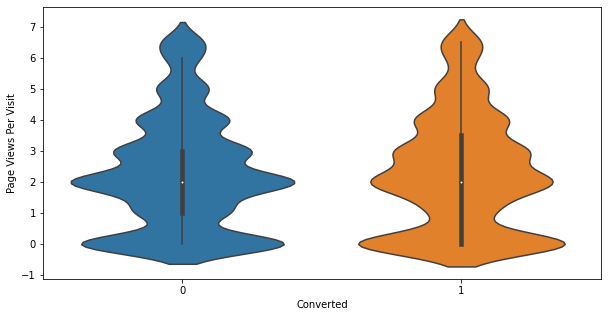

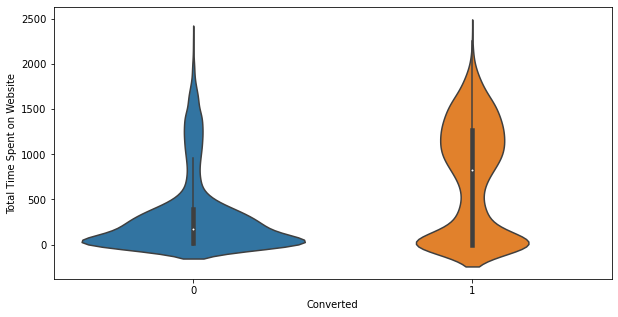

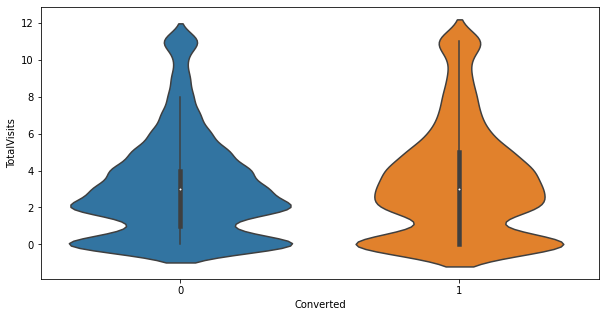

In [2194]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()


plt.figure(figsize = (10,5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()


plt.figure(figsize = (10,5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()



In [2028]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

In [2029]:
# # To Summarise:
    
# # Lead Origin

# 30-35% conversion rate is there of API and Landing Page however count for the leads that they generate is not much
# 90% conversion rate is there is Lead Add form however count of leads arent much large.
# there is low number of Lead Import
# so API Landing Page Submission origin create more leads so more value should be given to them


# # Lead Source
# a lot of leads are created by Google and Direct traffic 
# olark chat organic search direct traffic google are some which are very useful in creating a lot of leads which will enhance
# the conversion rate 


# # Total Visits
# converted and non converted medians are the same so we cant infer much 


# # Total time spent on website
# more chance of people spending more time in the website if it is made more user interesting and exciting for the user. 


# Page Views Per Visit
# Not much can be assessed from this regarding the lead conversion 


# # Last Activity

# many leads have opened email as part of the last activity but for the sms sent as last activity the conversion rate is
# about 62%


# # Country
# maximum number of people are from india so india has chance of doing business from US, Middle East & Europe.


# # Speecialization
# it has large conversion rate so this should be given more weightage

# # Occupation
# people who are employed are more likely to join the course
# unemployed leads are maximum count wise and have conversion rate of 30-35%

# # What matters most to you in choosing a course
# maimum values are 'Better Career Prospects' so its not helpful

# Search
# Most entries are 'No'. No Inference can be drawn with this parameter.

# Magazine
# this is useless since all the values are No


# News paper article
# this is useless since all the values are No

# X Education Forums
# Most entries are 'No'. No Inference can be drawn with this parameter.

# Newspaper
# this is useless since all the values are No


# Digital Advertisement
# this is useless since all the values are No

# Through Recommendations
# this is useless since all the values are No

# Receive More Updates About Our Courses
# this is useless since all the values are No

# Update me on Supply Chain Content
# this is useless since all the values are No

# # Get updates on DM Content
# this is useless since all the values are No


# I agree to pay the amount through cheque
# this is useless since all the values are No

# A free copy of Mastering The Interview
# of no use to make any inference

# City
# Mumbai has maximum of the leads with about conversion rate of 30%

# # Last Notable Activity
# for a positive lead SMS Sent is a very good marker


# # Results

# # a number of columns can be removed because they arent helping much in providing more information

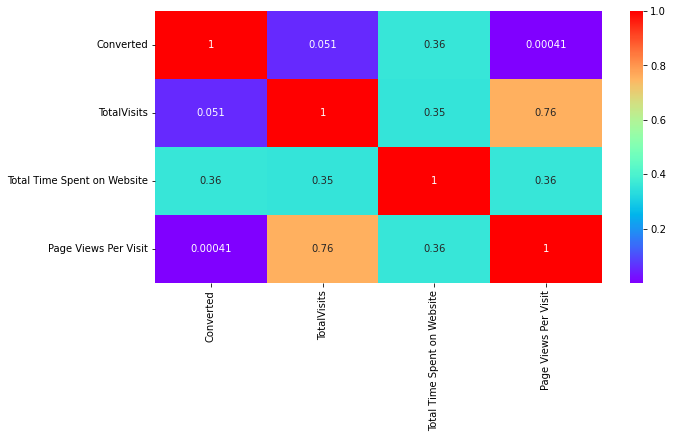

In [2030]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10,5))
sns.heatmap(lead.corr(), annot = True, cmap="rainbow")
plt.show()

In [2031]:
#Values under 'Last Activity' are coverved as values under 'Last Notable Activity'. Either of one can be dropped. 
lead.drop(['Last Notable Activity'], 1, inplace = True)

In [2032]:
lead.shape

(9074, 12)

In [2033]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)
# lead.head()

In [2034]:
lead.shape

(9074, 12)

In [2035]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City']], drop_first=True)

dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2036]:
dummy1.shape

(9074, 49)

In [2037]:
# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2038]:
lead.shape

(9074, 61)

In [2039]:
# drop original columns Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation','City
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation','City'],
                 axis = 1)

lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2040]:
lead.shape

(9074, 55)

In [2041]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2042]:
# split into X and y

In [2043]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)

In [2044]:
# Putting response variable to y
y = lead['Converted']

In [2045]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=333)

In [2046]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7259, 54), (7259,), (1815, 54), (1815,))

In [2047]:
# Scaling the numerical variables of X_train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.276928,-0.255196,0.943098,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.716938,-0.587537,1.488699,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.276928,0.282792,0.943098,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,0.974074,-0.183587,2.034299,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.420218,-0.064238,-0.148103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [2048]:
X_train.describe()
# we get the min and max values as o and 1

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,7259.000000,7259.000000,7.259000e+03,7.259000e+03,7.259000e+03,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.00000,7259.00000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000,7259.000000
mean,0.078110,0.000276,-5.647661e-17,-9.620200e-18,1.248332e-16,0.536024,0.066676,0.003168,0.003306,0.313542,0.191900,0.127153,0.002893,0.050833,0.013914,0.014603,0.034991,0.02893,0.38008,0.012261,0.106213,0.004271,0.069018,0.300868,0.009919,0.006337,0.041052,0.006750,0.012674,0.104835,0.016944,0.012123,0.093815,0.039675,0.020664,0.091610,0.022593,0.054966,0.362860,0.011159,0.007164,0.004408,0.037608,0.022730,0.000964,0.001791,0.022179,0.899573,0.074666,0.075355,0.050007,0.042568,0.082794,0.008679
std,0.268363,0.016598,1.000069e+00,1.000069e+00,1.000069e+00,0.498735,0.249477,0.056204,0.057409,0.463964,0.393822,0.333167,0.053712,0.219673,0.117141,0.119964,0.183770,0.16762,0.48544,0.110054,0.308131,0.065214,0.253502,0.458667,0.099104,0.079358,0.198425,0.081888,0.111871,0.306362,0.129072,0.109442,0.291591,0.195208,0.142267,0.288495,0.148611,0.227930,0.480858,0.105050,0.084340,0.066253,0.190261,0.149053,0.031041,0.042284,0.147277,0.300589,0.262870,0.263981,0.217974,0.201895,0.275589,0.092762
min,0.000000,0.000000,-1.117364e+00,-8.904999e-01,-1.239304e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.687908e-01,-8.721385e-01,-6.937034e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,

In [2049]:
X_train.shape

(7259, 54)

In [2050]:
X_train.columns.shape

(54,)

In [2051]:
# now we build our first model using statsmodel and we see the summary 
import statsmodels.api as sm

In [2052]:
# adding a column in the X_train consisting of only ones
sm.add_constant(X_train).shape

(7259, 55)

In [2053]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7204
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.3
Date:                Mon, 08 Apr 2024   Deviance:                       5908.6
Time:                        16:05:42   Pearson chi2:                 7.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3374      1.096     -0.308      0.758      -2.486       1.811
Do Not Email                                            -1.2671      0.203     -6.234      0.000      -1.665      -0.869
Do Not Call                                             21.5042   3.09e+04      0.001      0.999   -6.06e+04    6.06e+04
TotalVisits                                              0.3428      0.051      6.774      0.000       0.244       0.442
Total Time Spent on Website                              1.1031      0.038     28.924      0.000       1.028       1.178
Page Views Per Visit                                    -0.3251      0.057     -5.725      0.000      -0.436      -0.214
Lead Origin_Landing Page Submission                     -0.9301      0.129     -7.218      0.000      -1.183      -0.678
Lead Origin_Lead Add Form                                1.6329      0.956      1.709      0.087      -0.240       3.506
Lead Origin_Lead Import                                 21.6840   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.1261   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3432      0.091      3.792      0.000       0.166       0.521
Lead Source_Olark Chat                                   1.3481      0.151      8.955      0.000       1.053       1.643
Lead Source_Organic Search                               0.2355      0.121      1.946      0.052      -0.002       0.473
Lead Source_Others                                       0.6783      0.650      1.044      0.296      -0.595       1.952
Lead Source_Reference                                    1.9768      0.977      2.024      0.043       0.063       3.891
Lead Source_Referral Sites                              -0.1486      0.329     -0.452      0.651      -0.793       0.496
Lead Source_Welingak Website                             5.2902      1.395      3.792      0.000       2.556       8.025
Last Activity_Email Bounced                              0.2153      0.419      0.514      0.607      -0.605       1.036
Last Activity_Email Link Clicked                         0.7744      0.276      2.801      0.005       0.233       1.316
Last Activity_Email Opened                               1.0903      0.204      5.351      0.000       0.691       1.490
Last Activity_Form Submitted on Website                  0.4681      0.358      1.307      0.191      -0.234       1.170
Last Activity_Olark Chat Conversation                   -0.6488      0.257     -2.526      0.012      -1.152      -0.145
Last Activity_Other_Activity                             2

In [2054]:
#  high p values are in several features

In [2055]:
X_train.columns.shape

(54,)

In [2056]:
# now we build  logistic Regression model using scikit learn and get the rfe rankings of the variables to know their importance and get an idea of multicoliearity

In [2057]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [2058]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 (

In [2059]:
# lets take the 18 important variables and work on them
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [2060]:
# X_train.columns[~rfe.support_]
# X_train.columns[~rfe.ranking_]

In [2061]:
# model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.6
Date:                Mon, 08 Apr 2024   Deviance:                       6015.3
Time:                        16:05:49   Pearson chi2:                 7.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0997      0.568      0.175      0.861      -1.014       1.214
Do Not Email                                            -1.3886      0.176     -7.870      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1067      0.037     29.547      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1085      0.119     -9.337      0.000      -1.341      -0.876
Lead Origin_Lead Add Form                                1.9403      0.845      2.297      0.022       0.285       3.596
Lead Source_Olark Chat                                   1.1113      0.114      9.718      0.000       0.887       1.335
Lead Source_Reference                                    1.4356      0.866      1.657      0.097      -0.262       3.133
Lead Source_Welingak Website                             4.7482      1.318      3.602      0.000       2.164       7.332
Last Activity_Email Opened                               0.6084      0.100      6.076      0.000       0.412       0.805
Last Activity_Olark Chat Conversation                   -1.0889      0.182     -5.986      0.000      -1.445      -0.732
Last Activity_Other_Activity                             2.3913      0.489      4.889      0.000       1.433       3.350
Last Activity_SMS Sent                                   1.8097      0.102     17.710      0.000       1.609       2.010
Last Activity_Unreachable                                0.6764      0.323      2.094      0.036       0.043       1.309
Last Activity_Unsubscribed                               1.3414      0.481      2.789      0.005       0.399       2.284
Specialization_Others                                   -1.1689      0.115    -10.145      0.000      -1.395      -0.943
What is your current occupation_Housewife               21.9842   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Student                 -0.7499      0.602     -1.246      0.213      -1.929       0.430
What is your current occupation_Unemployed              -0.9671      0.561     -1.723      0.085      -2.067       0.133
What is your current occupation_Working Professional     1.7322      0.587      2.950      0.003       0.581       2.883
========================================================================================================================
"""

In [2062]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2063]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.22
16,What is your current occupation_Unemployed,15.45
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.22
13,Specialization_Others,4.60
7,Last Activity_Email Opened,3.31
10,Last Activity_SMS Sent,2.79
4,Lead Source_Olark Chat,2.37
17,What is your current occupation_Working Profes...,2.09


In [2064]:
# dropping the column based on high p value
col1 = col.drop('What is your current occupation_Housewife',1)


In [2065]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3010.2
Date:                Mon, 08 Apr 2024   Deviance:                       6020.3
Time:                        16:05:50   Pearson chi2:                 7.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5776      0.527      1.097      0.273      -0.455       1.610
Do Not Email                                            -1.3911      0.177     -7.878      0.000      -1.737      -1.045
Total Time Spent on Website                              1.1055      0.037     29.529      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1017      0.119     -9.287      0.000      -1.334      -0.869
Lead Origin_Lead Add Form                                1.9426      0.845      2.300      0.021       0.287       3.598
Lead Source_Olark Chat                                   1.1106      0.114      9.712      0.000       0.886       1.335
Lead Source_Reference                                    1.4382      0.866      1.661      0.097      -0.259       3.135
Lead Source_Welingak Website                             4.7460      1.318      3.600      0.000       2.162       7.330
Last Activity_Email Opened                               0.6122      0.100      6.117      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0906      0.182     -5.990      0.000      -1.447      -0.734
Last Activity_Other_Activity                             2.3934      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8115      0.102     17.728      0.000       1.611       2.012
Last Activity_Unreachable                                0.6738      0.324      2.082      0.037       0.039       1.308
Last Activity_Unsubscribed                               1.3463      0.481      2.800      0.005       0.404       2.289
Specialization_Others                                   -1.1639      0.115    -10.106      0.000      -1.390      -0.938
What is your current occupation_Student                 -1.2353      0.561     -2.201      0.028      -2.335      -0.136
What is your current occupation_Unemployed              -1.4525      0.518     -2.806      0.005      -2.467      -0.438
What is your current occupation_Working Professional     1.2466      0.545      2.286      0.022       0.178       2.316
========================================================================================================================
"""

In [2066]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.21
15,What is your current occupation_Unemployed,15.29
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.17
13,Specialization_Others,4.59
7,Last Activity_Email Opened,3.29
10,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
16,What is your current occupation_Working Profes...,2.07


In [2067]:
# droppign the column with high p value
col1 = col1.drop('Lead Source_Reference',1)

In [2068]:
# rebuilding the model
# model 3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.3
Date:                Mon, 08 Apr 2024   Deviance:                       6022.6
Time:                        16:05:50   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5785      0.526      1.099      0.272      -0.453       1.610
Do Not Email                                            -1.3882      0.176     -7.872      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1049      0.037     29.510      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.0999      0.119     -9.276      0.000      -1.332      -0.867
Lead Origin_Lead Add Form                                3.3227      0.221     15.054      0.000       2.890       3.755
Lead Source_Olark Chat                                   1.1082      0.114      9.686      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3633      1.034      3.253      0.001       1.337       5.390
Last Activity_Email Opened                               0.6121      0.100      6.116      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0897      0.182     -5.987      0.000      -1.446      -0.733
Last Activity_Other_Activity                             2.3933      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8114      0.102     17.731      0.000       1.611       2.012
Last Activity_Unreachable                                0.6755      0.323      2.089      0.037       0.042       1.309
Last Activity_Unsubscribed                               1.3438      0.481      2.795      0.005       0.402       2.286
Specialization_Others                                   -1.1605      0.115    -10.083      0.000      -1.386      -0.935
What is your current occupation_Student                 -1.2349      0.561     -2.203      0.028      -2.334      -0.136
What is your current occupation_Unemployed              -1.4553      0.517     -2.814      0.005      -2.469      -0.442
What is your current occupation_Working Professional     1.2454      0.545      2.285      0.022       0.177       2.313
========================================================================================================================
"""

In [2069]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,15.29
2,Lead Origin_Landing Page Submission,7.17
12,Specialization_Others,4.59
6,Last Activity_Email Opened,3.29
9,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
15,What is your current occupation_Working Profes...,2.07
3,Lead Origin_Lead Add Form,1.98
7,Last Activity_Olark Chat Conversation,1.94
5,Lead Source_Welingak Website,1.37


In [2070]:
# dropping the column with highest vif 
col1 = col1.drop('What is your current occupation_Unemployed',1)

In [2071]:
# model 3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.5
Date:                Mon, 08 Apr 2024   Deviance:                       6031.0
Time:                        16:05:51   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8499      0.136     -6.241      0.000      -1.117      -0.583
Do Not Email                                            -1.3823      0.176     -7.853      0.000      -1.727      -1.037
Total Time Spent on Website                              1.1057      0.037     29.544      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.443      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3255      0.221     15.078      0.000       2.893       3.758
Lead Source_Olark Chat                                   1.1048      0.114      9.661      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3567      1.034      3.247      0.001       1.330       5.383
Last Activity_Email Opened                               0.6128      0.100      6.130      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0813      0.182     -5.954      0.000      -1.437      -0.725
Last Activity_Other_Activity                             2.3854      0.489      4.878      0.000       1.427       3.344
Last Activity_SMS Sent                                   1.8038      0.102     17.678      0.000       1.604       2.004
Last Activity_Unreachable                                0.6855      0.321      2.137      0.033       0.057       1.314
Last Activity_Unsubscribed                               1.3294      0.481      2.765      0.006       0.387       2.272
Specialization_Others                                   -1.1829      0.115    -10.298      0.000      -1.408      -0.958
What is your current occupation_Student                  0.2112      0.223      0.945      0.345      -0.227       0.649
What is your current occupation_Working Professional     2.6906      0.182     14.774      0.000       2.334       3.047
========================================================================================================================
"""

In [2072]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.82
12,Specialization_Others,2.56
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.22
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


In [2073]:
# dropping the column with high p value
col1 = col1.drop('What is your current occupation_Student',1)

In [2074]:
# model 4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.9
Date:                Mon, 08 Apr 2024   Deviance:                       6031.9
Time:                        16:05:51   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8442      0.136     -6.206      0.000      -1.111      -0.578
Do Not Email                                            -1.3833      0.176     -7.855      0.000      -1.728      -1.038
Total Time Spent on Website                              1.1062      0.037     29.558      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.440      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3319      0.220     15.117      0.000       2.900       3.764
Lead Source_Olark Chat                                   1.1073      0.114      9.685      0.000       0.883       1.331
Lead Source_Welingak Website                             3.3478      1.034      3.239      0.001       1.322       5.374
Last Activity_Email Opened                               0.6128      0.100      6.129      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0796      0.182     -5.945      0.000      -1.435      -0.724
Last Activity_Other_Activity                             2.3802      0.489      4.868      0.000       1.422       3.339
Last Activity_SMS Sent                                   1.8000      0.102     17.657      0.000       1.600       2.000
Last Activity_Unreachable                                0.6798      0.321      2.120      0.034       0.051       1.308
Last Activity_Unsubscribed                               1.3255      0.481      2.756      0.006       0.383       2.268
Specialization_Others                                   -1.1843      0.115    -10.303      0.000      -1.410      -0.959
What is your current occupation_Working Professional     2.6855      0.182     14.753      0.000       2.329       3.042
========================================================================================================================
"""

In [2075]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
12,Specialization_Others,2.55
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


In [2076]:
# droppping the column with high p value
col1 = col1.drop('Last Activity_Unreachable',1)

In [2077]:
# model 5
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.1
Date:                Mon, 08 Apr 2024   Deviance:                       6036.1
Time:                        16:05:51   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7978      0.134     -5.963      0.000      -1.060      -0.536
Do Not Email                                            -1.3985      0.176     -7.959      0.000      -1.743      -1.054
Total Time Spent on Website                              1.1047      0.037     29.558      0.000       1.031       1.178
Lead Origin_Landing Page Submission                     -1.1185      0.118     -9.447      0.000      -1.351      -0.886
Lead Origin_Lead Add Form                                3.3358      0.220     15.140      0.000       2.904       3.768
Lead Source_Olark Chat                                   1.1052      0.114      9.671      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3380      1.034      3.230      0.001       1.312       5.364
Last Activity_Email Opened                               0.5683      0.097      5.851      0.000       0.378       0.759
Last Activity_Olark Chat Conversation                   -1.1227      0.180     -6.233      0.000      -1.476      -0.770
Last Activity_Other_Activity                             2.3357      0.488      4.783      0.000       1.379       3.293
Last Activity_SMS Sent                                   1.7561      0.099     17.706      0.000       1.562       1.951
Last Activity_Unsubscribed                               1.2957      0.480      2.698      0.007       0.354       2.237
Specialization_Others                                   -1.1868      0.115    -10.327      0.000      -1.412      -0.962
What is your current occupation_Working Professional     2.6835      0.182     14.747      0.000       2.327       3.040
========================================================================================================================
"""

In [2078]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.73
11,Specialization_Others,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.23
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


In [2079]:
# removing column with high p value
col1 = col1.drop('Last Activity_Unsubscribed',1)

In [2080]:
# model #6
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.2
Date:                Mon, 08 Apr 2024   Deviance:                       6042.4
Time:                        16:05:51   Pearson chi2:                 7.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7790      0.133     -5.842      0.000      -1.040      -0.518
Do Not Email                                            -1.2825      0.166     -7.711      0.000      -1.608      -0.957
Total Time Spent on Website                              1.1052      0.037     29.582      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.1198      0.118     -9.460      0.000      -1.352      -0.888
Lead Origin_Lead Add Form                                3.3290      0.220     15.126      0.000       2.898       3.760
Lead Source_Olark Chat                                   1.1082      0.114      9.700      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3207      1.033      3.215      0.001       1.296       5.345
Last Activity_Email Opened                               0.5501      0.097      5.698      0.000       0.361       0.739
Last Activity_Olark Chat Conversation                   -1.1434      0.180     -6.362      0.000      -1.496      -0.791
Last Activity_Other_Activity                             2.3143      0.487      4.747      0.000       1.359       3.270
Last Activity_SMS Sent                                   1.7315      0.098     17.617      0.000       1.539       1.924
Specialization_Others                                   -1.1882      0.115    -10.345      0.000      -1.413      -0.963
What is your current occupation_Working Professional     2.6853      0.182     14.778      0.000       2.329       3.041
========================================================================================================================
"""

In [2081]:
#-------------------model building till here---------------------
# res is the final model taken

In [2082]:
# Predicitons on the final model

In [2083]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm) # X_train_sm = sm.add_constant(X_train[col])
y_train_pred[:10]

9190    0.389505
8604    0.306466
2916    0.536234
189     0.102463
3037    0.440694
103     0.169623
2533    0.801114
4340    0.093295
1383    0.215318
6428    0.215318
dtype: float64

In [2084]:
y_train_pred.values

array([0.38950531, 0.30646585, 0.53623408, ..., 0.00712023, 0.0925561 ,
       0.11464129])

In [2085]:
# these are the probabilities of getting 1

In [2086]:
# reshaping them
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38950531, 0.30646585, 0.53623408, 0.10246346, 0.4406941 ,
       0.16962343, 0.80111378, 0.0932948 , 0.21531798, 0.21531798])

In [2087]:
# getting the prediction in dataframe form make two columns 
# assigning these probabilities in a form of yes no
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
# y_train_pred_final.head()

# to this we add the prediceted state where the probabilities are assigned 0 or 1.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# we just assign anything less than 0.5 as 0(probability of not churning) and more than 0.5 as 1(probability of churning).
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [2088]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4022  481]
 [ 935 1821]]


In [2089]:
confusion

array([[4022,  481],
       [ 935, 1821]], dtype=int64)

In [2090]:
# sum(confusion)
# sum(sum(confusion))

In [2091]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8049318087890894


In [2092]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.72
10,Specialization_Others,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.22
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.20


In [2093]:
X_train[col1].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [2094]:
# all the vifs are less than 3

In [2095]:
# now lets calculate the specificity sesititvity positive predicted value and negative predicted value

In [2096]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2097]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.6607402031930334

In [2098]:
# Let us calculate specificity
TN / float(TN+FP)

0.8931823228958472

In [2099]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.10681767710415278


In [2100]:
# positive predictive value 
print (TP / float(TP+FP))

0.7910512597741095


In [2101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8113778495057494


In [2102]:
# ROC curve in python

In [2103]:
y_train.head()

9190    0
8604    0
2916    0
189     1
3037    0
Name: Converted, dtype: int64

In [2104]:
# y_train_pred.head()

In [2105]:
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [2106]:
# lets draw an roc curve to see the specificity and sensitivity tradeoffs

In [2107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate] or Sensitivity')
    plt.ylabel('True Positive Rate/ Specificity')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

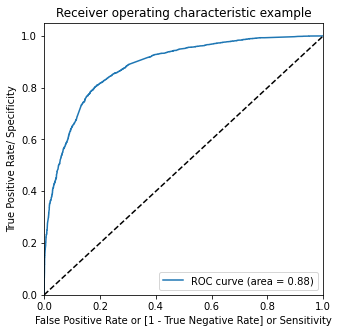

In [2109]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [2110]:
# the curve is ok descent
# as sensitivity increases the specificity decreases

In [2111]:
# now we find the optimum cutoff
# it should be the one which balances the specificity and sensitivity

In [2112]:
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [2113]:
# since we have seen the predicted values in the y_train_pred_final for threshold 0.5 now lets see it in other thresholds 

In [2114]:
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [2115]:
y_train_pred_final

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0
5,0,0.169623,0
6,1,0.801114,1
7,0,0.093295,0
8,1,0.215318,0
9,0,0.215318,0


In [2116]:
# lets create different cutoff points/thresholds
    
num = [float(x)/10 for x in range(10)]
num

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [2117]:
# Now create different columns with the created probability cutoffs 

for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0


In [2118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379667  1.000000  0.000000
0.1   0.1  0.603251  0.972787  0.377082
0.2   0.2  0.732195  0.920900  0.616700
0.3   0.3  0.796666  0.839260  0.770597
0.4   0.4  0.814713  0.777576  0.837442
0.5   0.5  0.804932  0.660740  0.893182
0.6   0.6  0.794049  0.589623  0.919165
0.7   0.7  0.778620  0.507620  0.944481
0.8   0.8  0.755614  0.405660  0.969798
0.9   0.9  0.705469  0.239115  0.990895


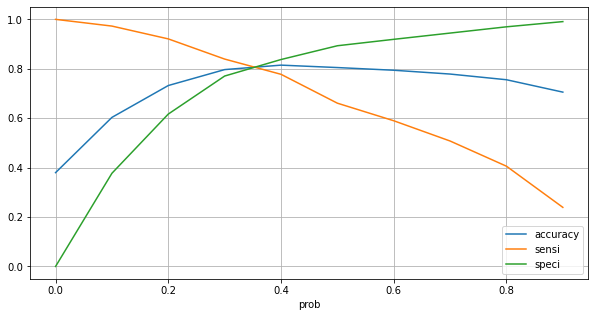

In [2119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

In [2120]:
# as the cutoff increases the specificity(green line) also increases
# as the cutoff decreasess the sensitivity is increases
# the valus of all three are the same in 0.34

In [2121]:
#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1


In [2122]:
# Assigning Lead Score
# creating a column for Lead_Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1,39
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1,54
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1,44


In [2123]:
# Let's check the overall accuracy.
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
trainaccuracy

0.8049318087890894

In [2124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3607,  896],
       [ 508, 2248]], dtype=int64)

In [2125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2126]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.8156748911465893

In [2127]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.8010215411947591

In [2128]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.19897845880524095


In [2129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7150127226463104


In [2130]:
# Negative predictive value
print(TN / float(TN+ FN))

0.8765492102065614


In [2131]:
# Precision and Recall
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score
precision= precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.7910512597741095

In [2132]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall


0.6607402031930334

In [2133]:
trainF1_score= 2 * (precision * recall) / (precision + recall)
trainF1_score

0.7200474495848161

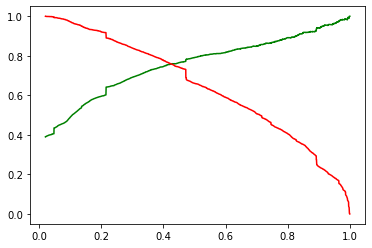

In [2134]:
# Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [2135]:
# making prediction on test set
# lets take sensitivity and specificity and take cutoff and then we make the predictions on test set.
# till now we did everything on the train set

In [2136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 1461 to 2404
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          1815 non-null   int64  
 1   Do Not Call                                           1815 non-null   int64  
 2   TotalVisits                                           1815 non-null   float64
 3   Total Time Spent on Website                           1815 non-null   int64  
 4   Page Views Per Visit                                  1815 non-null   float64
 5   Lead Origin_Landing Page Submission                   1815 non-null   uint8  
 6   Lead Origin_Lead Add Form                             1815 non-null   uint8  
 7   Lead Origin_Lead Import                               1815 non-null   uint8  
 8   Lead Source_Facebook                                  1

In [2137]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,0,0,5.0,71,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7926,0,0,4.0,233,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1909,0,0,5.0,431,2.50,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8971,0,0,4.0,1776,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5310,0,0,4.0,101,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [2138]:
# Scaling the numerical features
# note we use scaler.transform only, fitting is not done
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.276928,-0.255196,0.943098,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.716938,-0.587537,1.488699,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.276928,0.282792,0.943098,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,0.974074,-0.183587,2.034299,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.420218,-0.064238,-0.148103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [2139]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [2140]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional
1461,0,-0.760134,0,0,0,0,0,1,0,0,1,0
7926,0,-0.462680,0,0,0,0,0,1,0,0,1,0
1909,0,-0.099125,1,0,0,0,1,0,0,0,0,0
8971,0,2.370480,1,0,0,0,1,0,0,0,0,0
5310,0,-0.705050,1,0,0,0,0,0,0,1,0,0


In [2141]:
X_test_sm = sm.add_constant(X_test)

In [2142]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1461    0.018878
7926    0.026034
1909    0.188731
8971    0.780935
5310    0.279575
4774    0.215318
2084    0.215318
6351    0.168332
335     0.892434
8202    0.224565
dtype: float64

In [2143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2144]:
# Let's see the head
y_pred_1.head()

,0
1461,0.018878
7926,0.026034
1909,0.188731
8971,0.780935
5310,0.279575


In [2145]:
y_test.head()

1461    0
7926    0
1909    0
8971    1
5310    0
Name: Converted, dtype: int64

In [2146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2147]:
y_test_df.head()

,Converted
1461,0
7926,0
1909,0
8971,1
5310,0


In [2148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final

,Converted,Converted_prob
1461,0,0.018878
7926,0,0.026034
1909,0,0.188731
8971,1,0.780935
5310,0,0.279575
4774,1,0.215318
2084,0,0.215318
6351,0,0.168332
335,1,0.892434
8202,0,0.224565


In [2150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_prob
1461,0,0.018878
7926,0,0.026034
1909,0,0.188731
8971,1,0.780935
5310,0,0.279575


In [2151]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [2152]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [2153]:
Lead_Score=y_pred_final.copy()
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
1461,0,0.018878,0,2
7926,0,0.026034,0,3
1909,0,0.188731,0,19
8971,1,0.780935,1,78
5310,0,0.279575,0,28


In [2154]:
Lead_Score.reset_index(level=0, inplace=True)
Lead_Score.drop(['Converted', 'Converted_prob', 'final_predicted'], 1, inplace = True)
Lead_Score.head()

,index,Lead_Score
0,1461,2
1,7926,3
2,1909,19
3,8971,78
4,5310,28


In [2155]:
Lead=lead_dub.copy()
Lead.reset_index(level=0, inplace=True)
Lead.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1, inplace = True)
Lead.head()

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [2156]:
Lead_Score=pd.merge(Lead,Lead_Score,on='index')
Lead_Score.drop(['index'], 1, inplace = True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,9
1,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,5
2,af465dfc-7204-4130-9e05-33231863c4b5,660616,25
3,8bf76a52-2478-476b-8618-1688e07874ad,660562,87
4,88867067-3750-4753-8d33-1c7d1db53b5e,660558,12


In [2157]:
Lead_Score.sort_values(["Lead_Score"], ascending = False,inplace=True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
509,6cb07bc3-6d9d-47a4-81e1-5c50011e380e,634040,100
1140,d23ae8c1-7938-4a8b-b22f-459adf894488,605210,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,100
1210,d34b684a-7d92-4f13-abfb-8a507ce0351c,601868,100
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,100


In [2158]:
from sklearn import metrics

# Let's check the overall accuracy.
testaccuracy= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
testaccuracy

0.8

In [2159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[928, 208],
       [155, 524]], dtype=int64)

In [2160]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.8156748911465893

In [2161]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.8010215411947591

In [2162]:
from sklearn.metrics import precision_score, recall_score

In [2163]:
precision= precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
precision

0.7158469945355191

In [2164]:
recall=recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
recall

0.7717231222385862

In [2165]:
testF1_score= 2 * (precision * recall) / (precision + recall)
testF1_score

0.7427356484762581

In [2166]:
Lead_Score


,Prospect ID,Lead Number,Lead_Score
509,6cb07bc3-6d9d-47a4-81e1-5c50011e380e,634040,100
1140,d23ae8c1-7938-4a8b-b22f-459adf894488,605210,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,100
1210,d34b684a-7d92-4f13-abfb-8a507ce0351c,601868,100
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,100
1214,3fc94a36-7f24-499e-b41e-feff6e67ec95,601835,100
41,0921ad51-b2bc-4abb-bb66-e9357b16c306,658831,100
939,5ca37d52-ad07-4658-8313-75afd90f31f3,614096,100
464,8ff353ab-1207-4608-a8cc-8172ea7c12eb,636860,100
317,d8ada66c-170f-41a9-b406-729a88b70778,643151,100


In [2167]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))


Train Data Accuracy    :80.49 %
Train Data Sensitivity :81.57 %
Train Data Specificity :80.1 %
Train Data F1 Score    :0.72  
Test Data Accuracy     :80.0 %
Test Data Sensitivity  :81.57 %
Test Data Specificity  :80.1 %
Test Data F1 Score     :0.74  


In [2168]:
from sklearn.metrics import classification_report

In [2169]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4503
           1       0.72      0.82      0.76      2756

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259



In [2170]:
print (classification_report(y_pred_final.Converted, y_pred_final.final_predicted))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1136
           1       0.72      0.77      0.74       679

    accuracy                           0.80      1815
   macro avg       0.79      0.79      0.79      1815
weighted avg       0.80      0.80      0.80      1815

